### 범주형 변수 요약
- nominal 과 ordinal 변수가 각각 존재한다.

- 한 값(범주)에 몰려있는 변수들이 대다수 존재한다. 따라서 다른 범주 값에는 데이터의 정보가 거의 없는 경우가 많다.

- 5개 이상의 라벨 값이 있는 변수들이 많이 있으며, 그 라벨 기준 별 SalePrice의 중앙 값과 유사한 경우가 많다.

- 범주형 변수들 중 값이 서로 유사한 관계를 가지고 있는 변수들이 존재한다.

- Have_변수는 두 범주간 SalePrice와 약간의 차이가 있어보인다. 그 중, Have_EnclosedPorch 변수가 상대적으로 큰 차이를 보인다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import probplot, skew
from scipy.special import boxcox1p

pd.options.display.max_rows = 300

import warnings
warnings.filterwarnings('ignore')

In [2]:
palette_1 = sns.color_palette('Set1')
palette_2 = sns.color_palette('Paired', 10)
palette_3 = sns.color_palette('PuOr', 10)
palette_4 = sns.color_palette('Pastel1', 10)
palette_5 = sns.color_palette('Accent', 10)
palette_6 = sns.color_palette('Set3', 10)

In [3]:
house_df = pd.read_csv('C:\\Users\\이찬영\\Desktop\\House_Price\\Numeric_train_test.csv',index_col= 0)

In [4]:
cat_to_num = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold','Have_PoolArea', 'Have_LowQualFinSF', 'Have_3SsnPorch', 'Have_MiscVal', 'Have_ScreenPorch', 'Have_BsmtFinSF2', 'Have_EnclosedPorch']

for col in house_df.columns:
    if col in cat_to_num:
        house_df[col] = house_df[col].astype('O')

In [5]:
categorical_features = []

for feature in house_df.columns:
    if house_df[feature].dtypes == 'O':
        categorical_features.append(feature)

### 범주형 타입 확인

In [6]:
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond','OverallQual','OverallCond']

nominal_features = list(set(categorical_features) - set(ordinal_features))

#### Nominal Type

- 주택 외부 환경 관련 변수

    - 각 변수의 범주 값을 살펴볼 때, 특정 범주의 값에 몰려있어 다른 범주 값에 거의 없는 변수들이 존재한다.

        - LandSlope, Street, Condition2

    - 위 세 가지 변수와 달리 각 변수 내 범주의 값이 상대적으로 더 퍼져있지만 특정 범주에서는 데이터가 거의 존재하지 않는다. 또한, 해당 변수들은 거의 5개 이상의 범주로 구성되어있다.

        - MSZoning, PavedDrive, LotConfig, Condition1, Neighborhood

In [7]:
Ev_nominal_features = ['MSZoning', 'LandSlope', 'Street', 'PavedDrive', 'LotConfig', 'Condition1', 'Condition2', 'Neighborhood']

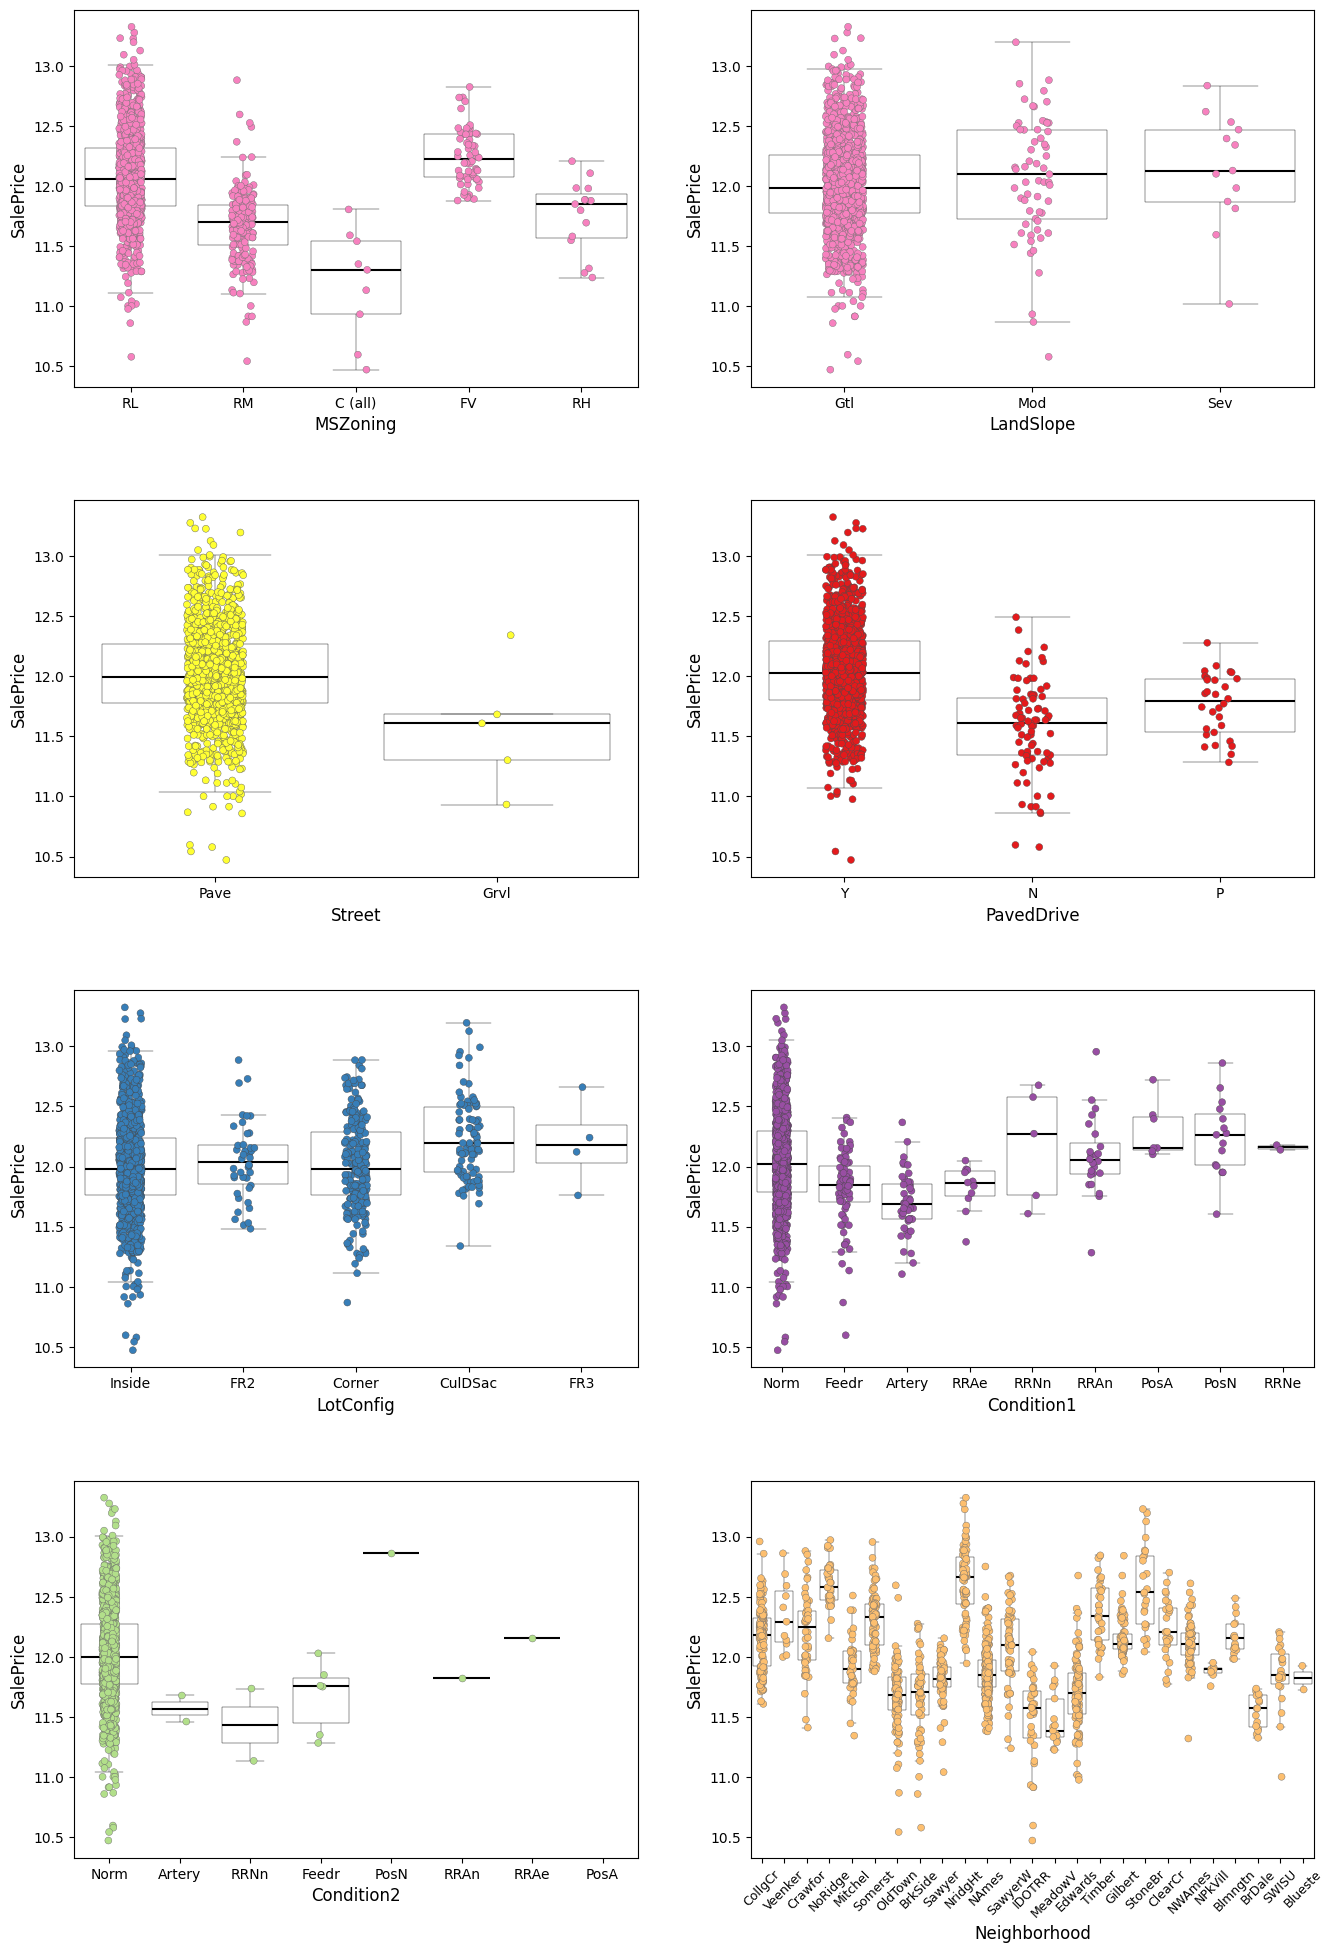

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(16, 24))
plt.subplots_adjust(hspace=0.3)


PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}


for i, feature in enumerate(Ev_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(4, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

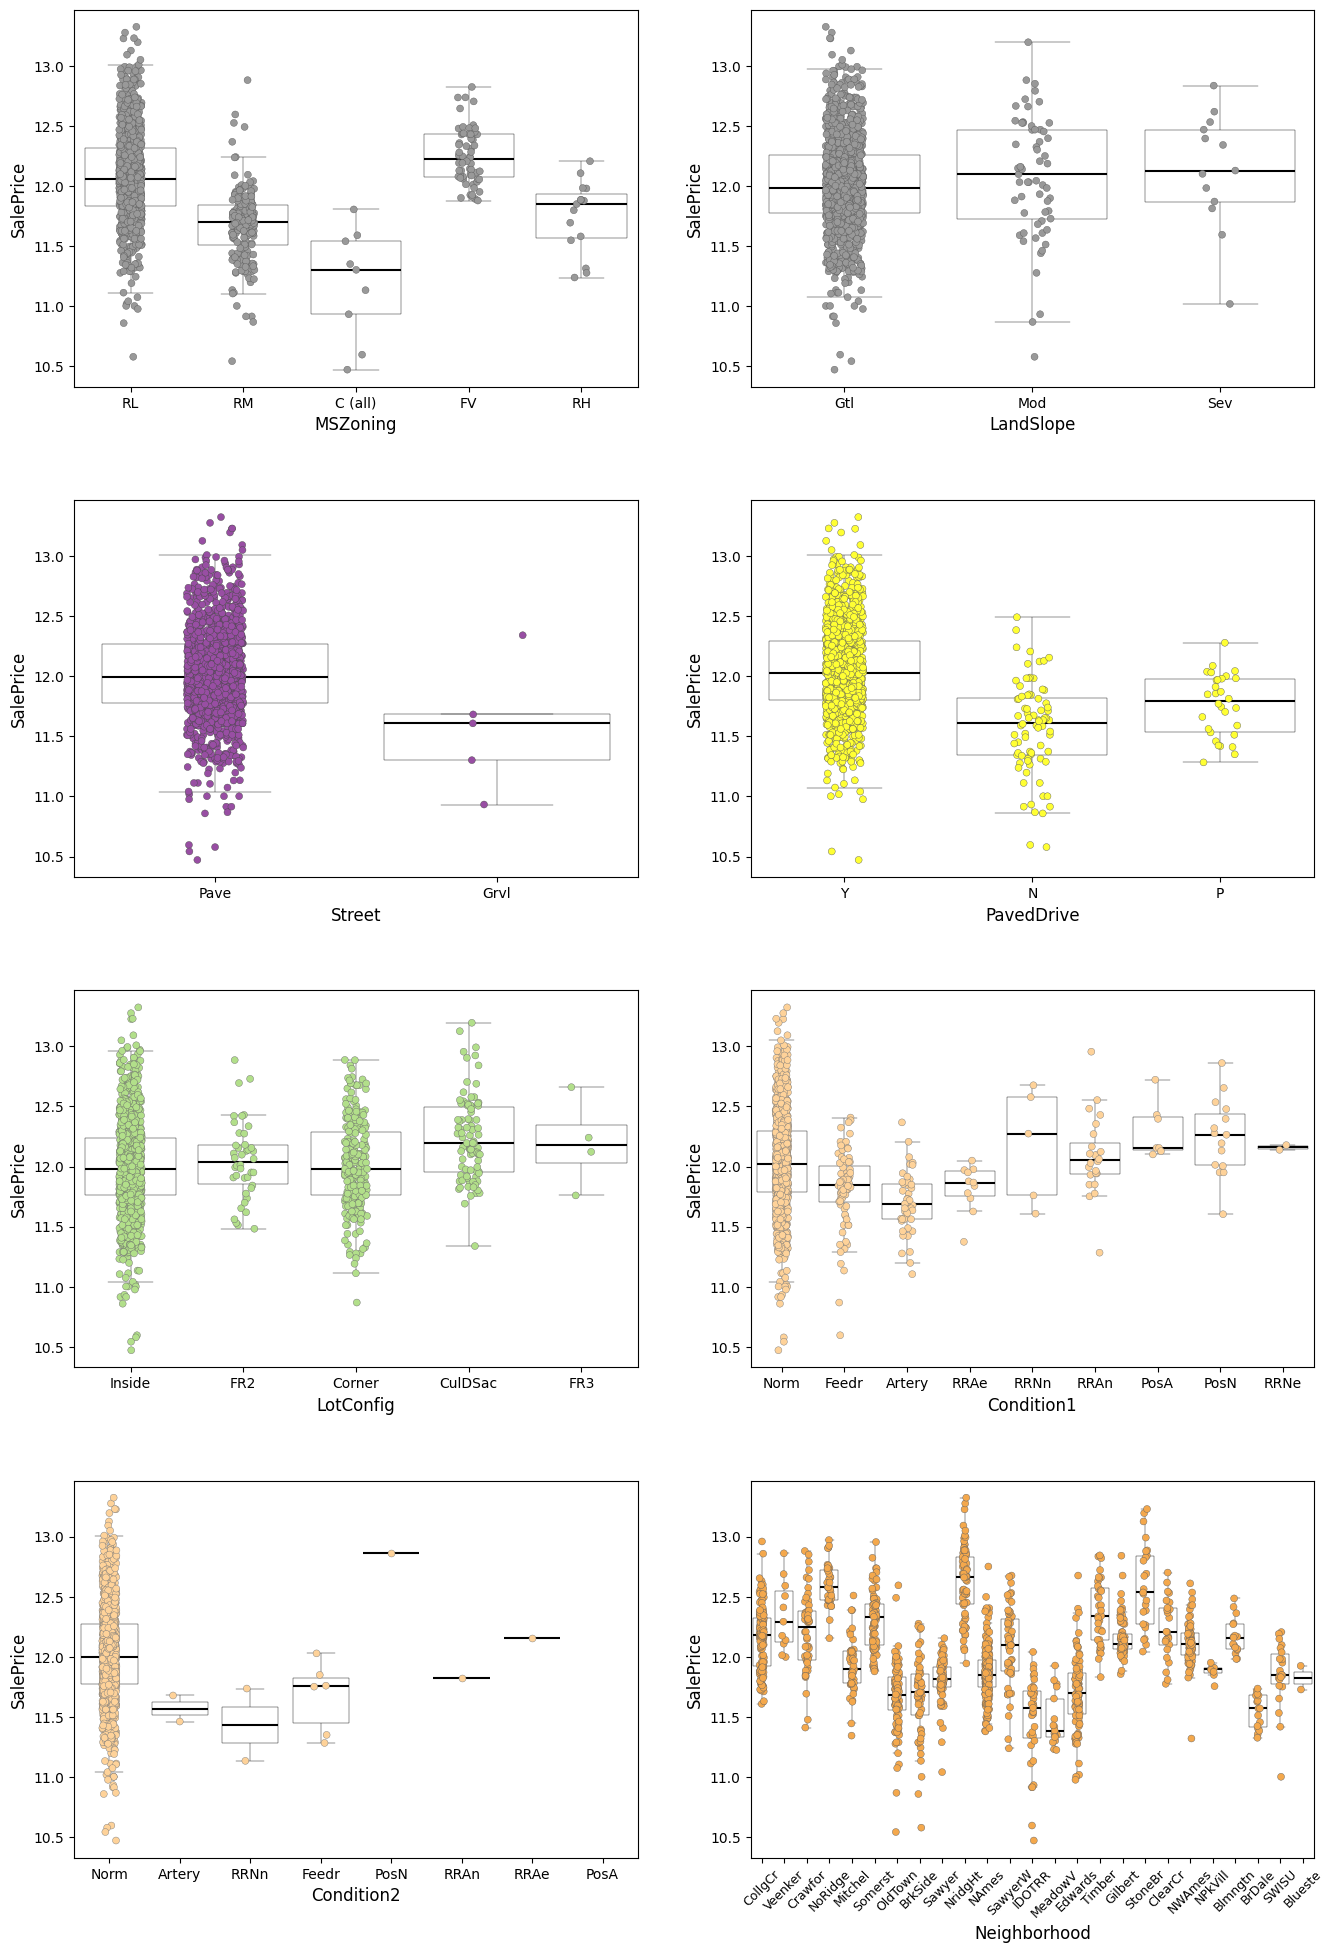

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(16, 24))
plt.subplots_adjust(hspace=0.3)


PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Ev_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(4, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 주거 유형 관련 변수
    
    - 각 변수의 범주 값을 살펴볼 때, 특정 범주의 값에 몰려있어 다른 범주 값에 거의 없는 변수들이 존재한다.

        - RoofStyle, RoofMatl, Functional

    - 위 세 가지 변수와 달리 각 변수 내 범주의 값이 상대적으로 더 퍼져있지만 특정 범주에서는 데이터가 거의 존재하지 않는다. 또한, 해당 변수들은 거의 5개 이상의 범주로 구성되어있다.

        - MSSubClass, BldgType, HouseStyle, LotShape

In [10]:
Ht_nominal_features = ['MSSubClass', 'RoofStyle', 'BldgType', 'HouseStyle', 'RoofMatl', 'LotShape', 'Functional']

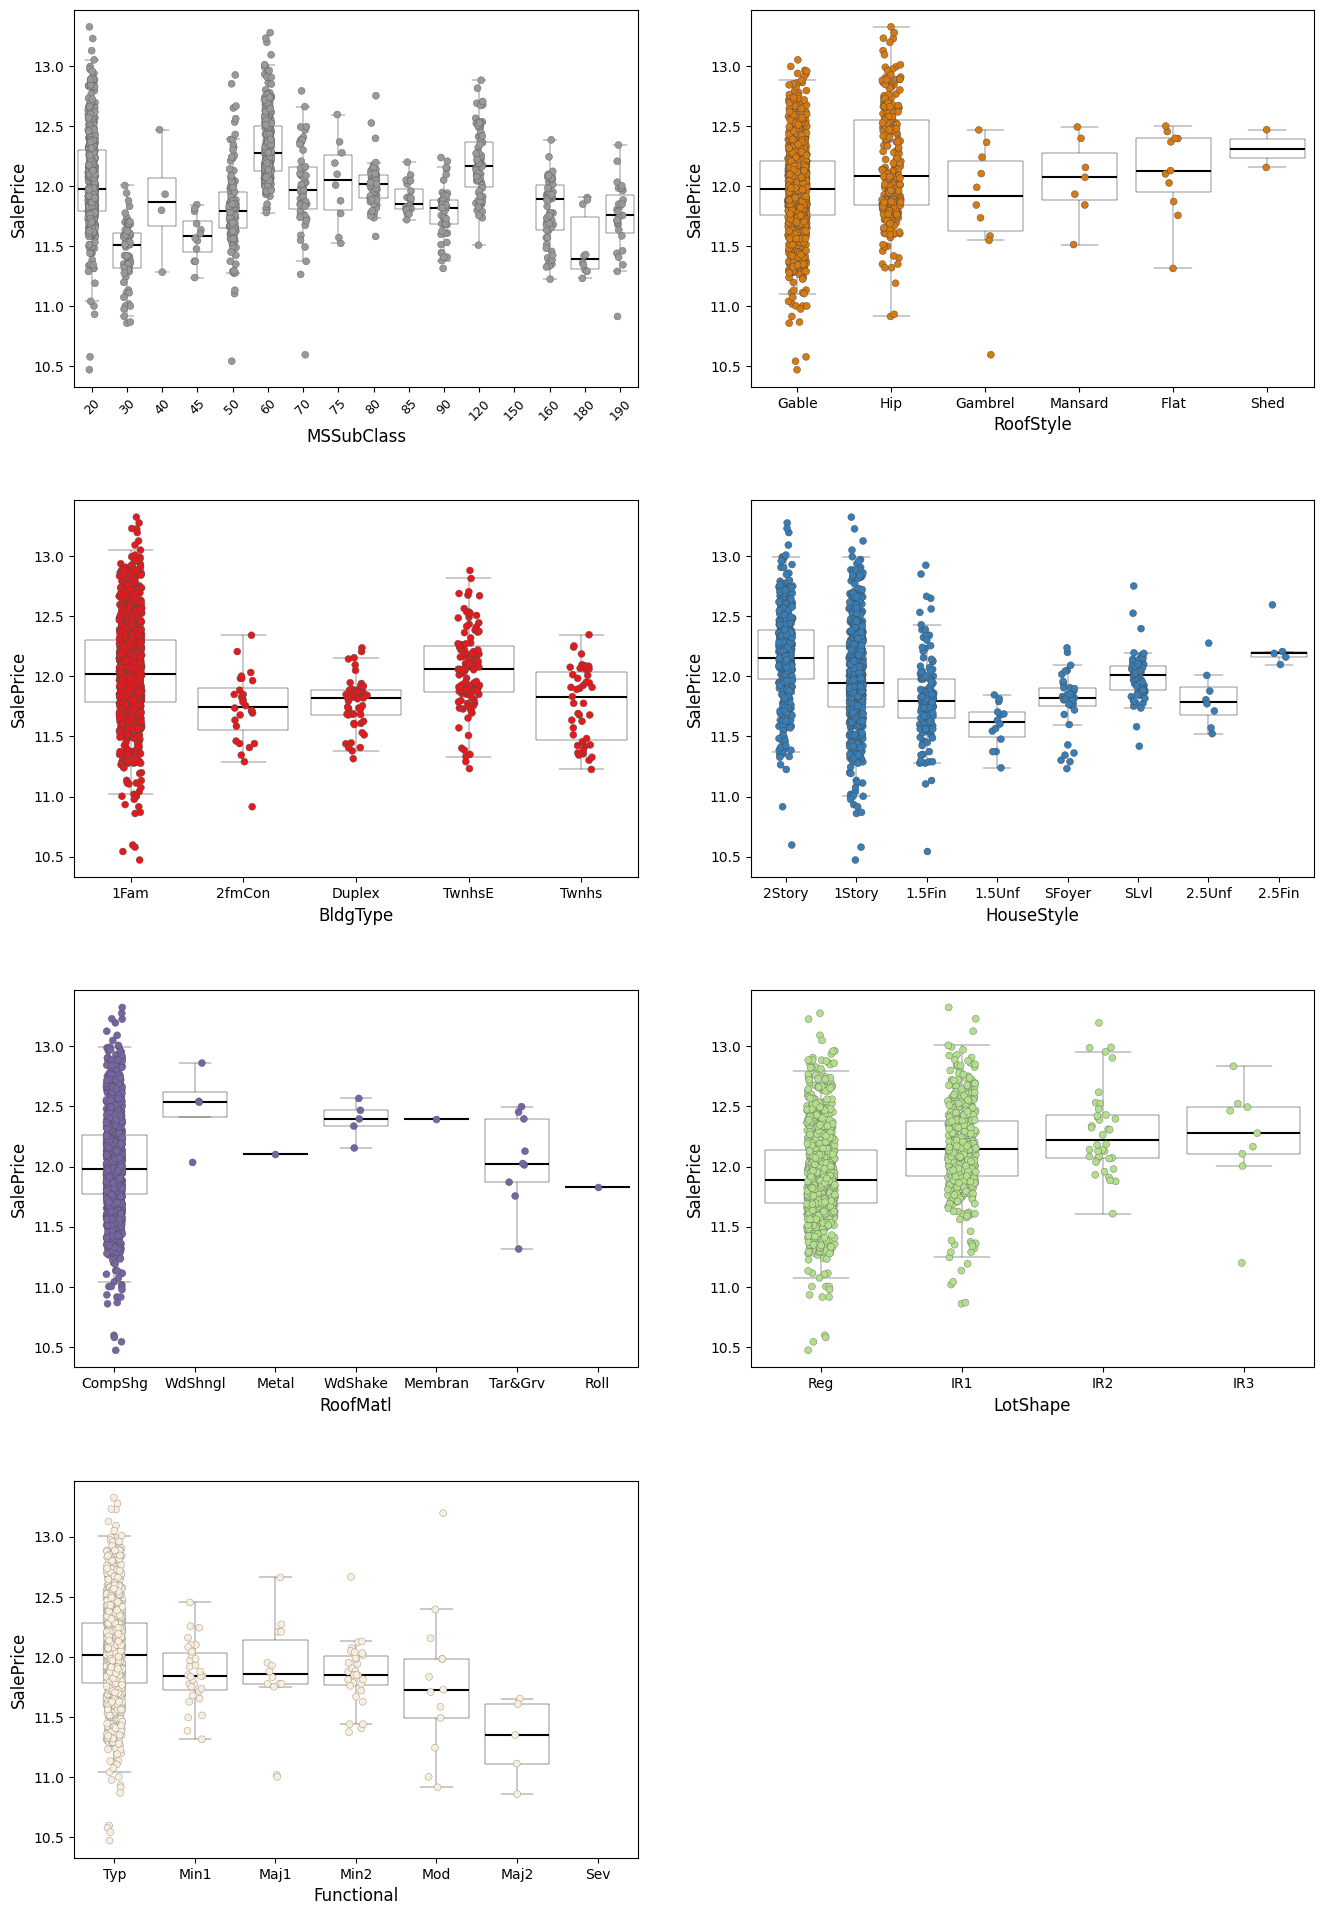

In [11]:
plt.figure(figsize=(16, 24))

plt.subplots_adjust(hspace=0.3)
PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Ht_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(4, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 지상층 관련 변수

    - 각 변수의 범주 값을 살펴볼 때, 특정 범주의 값에 몰려있어 다른 범주 값에 거의 없는 변수들이 존재한다.

        - KitchenAbvGr

    - 위 한 가지 변수와 달리 각 변수 내 범주의 값이 상대적으로 더 퍼져있지만 특정 범주에서는 데이터가 거의 존재하지 않는다. 또한, 해당 변수들은 거의 5개 이상의 범주로 구성되어있다.

        - BedroomAbvGr, FullBath, HalfBath, TotRmsAbvGrd

In [12]:
Gf_nominal_features = ['KitchenAbvGr', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']

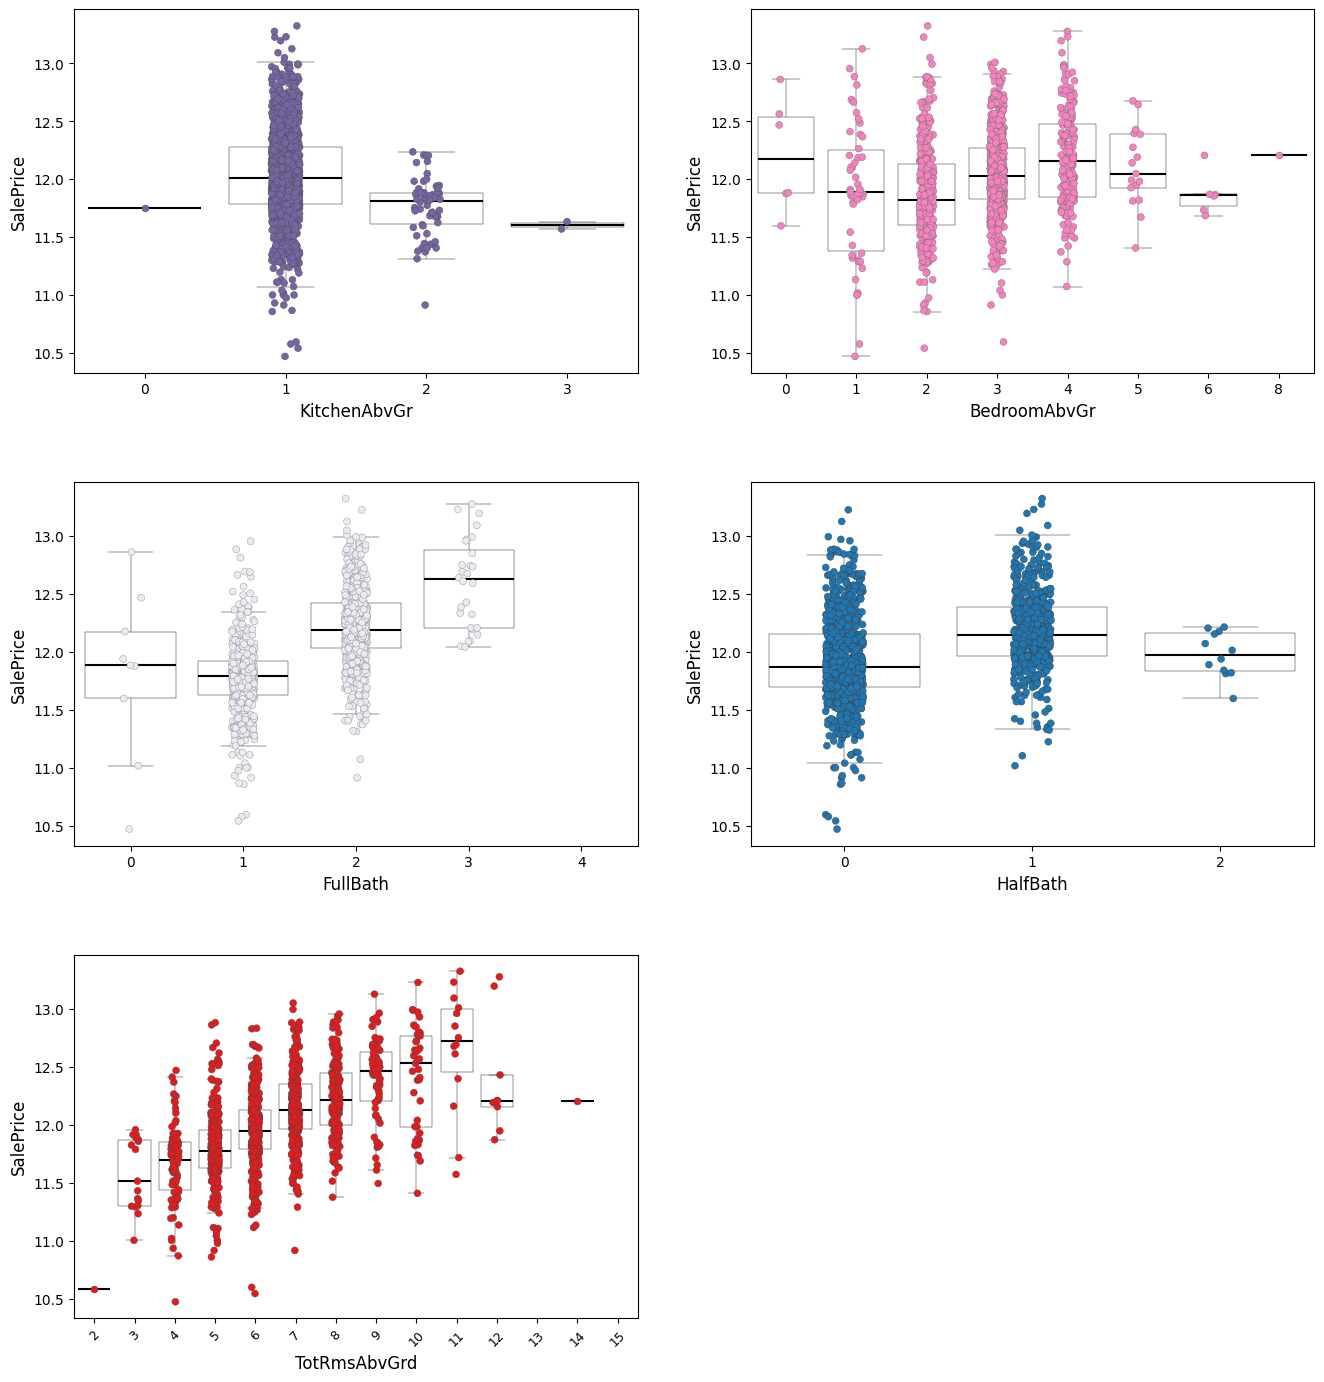

In [13]:
plt.figure(figsize=(16, 17))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Gf_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(3, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 지하실 관련 변수

    - 각 변수의 범주 값을 살펴볼 때, 특정 범주의 값에 몰려있어 다른 범주 값에 거의 없는 변수가 존재한다.

        - BsmtHalfBath

    - 위 한 가지 변수와 달리 각 변수 내 범주의 값이 상대적으로 더 퍼져있지만 특정 범주에서는 데이터가 거의 존재하지 않는다. 또한, 해당 변수들은 거의 5개 이상의 범주로 구성되어있다.

        - BsmtFinType1, BsmtFullBath, BsmtFinType2

In [14]:
Ce_nominal_features = ['BsmtFinType1', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinType2']

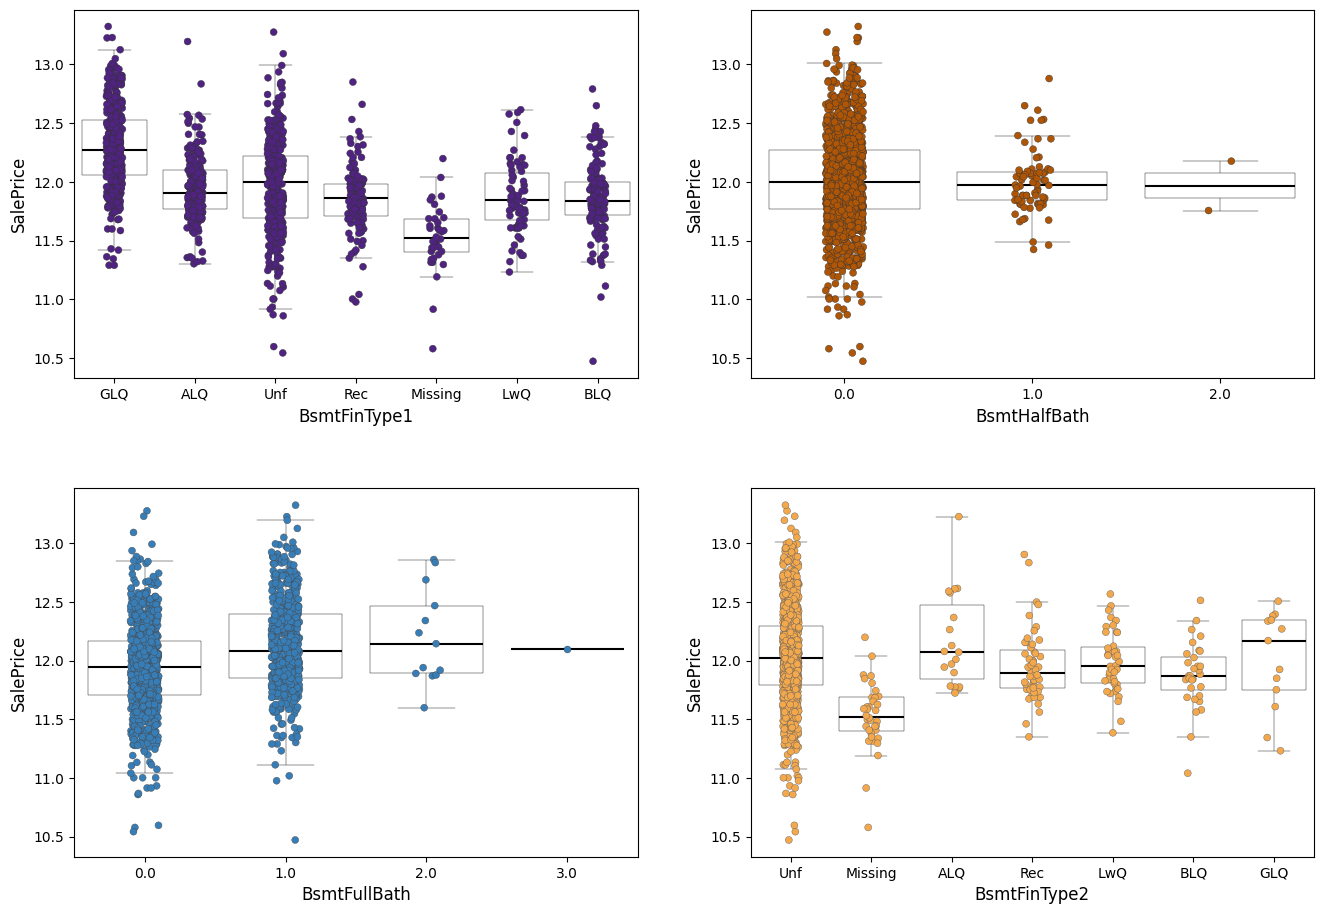

In [15]:
plt.figure(figsize=(16, 11))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Ce_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(2, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 주거 판매 관련 변수

    - YrSold 변수는 SalePrice에 영향을 미치지 않는 것으로 보인다.

    - 해당 변수들은 거의 5개 이상의 범주로 구성되어있다.

        - MoSold, SaleCondition, SaleType

In [16]:
Se_nominal_features = ['YrSold', 'MoSold', 'SaleCondition', 'SaleType']

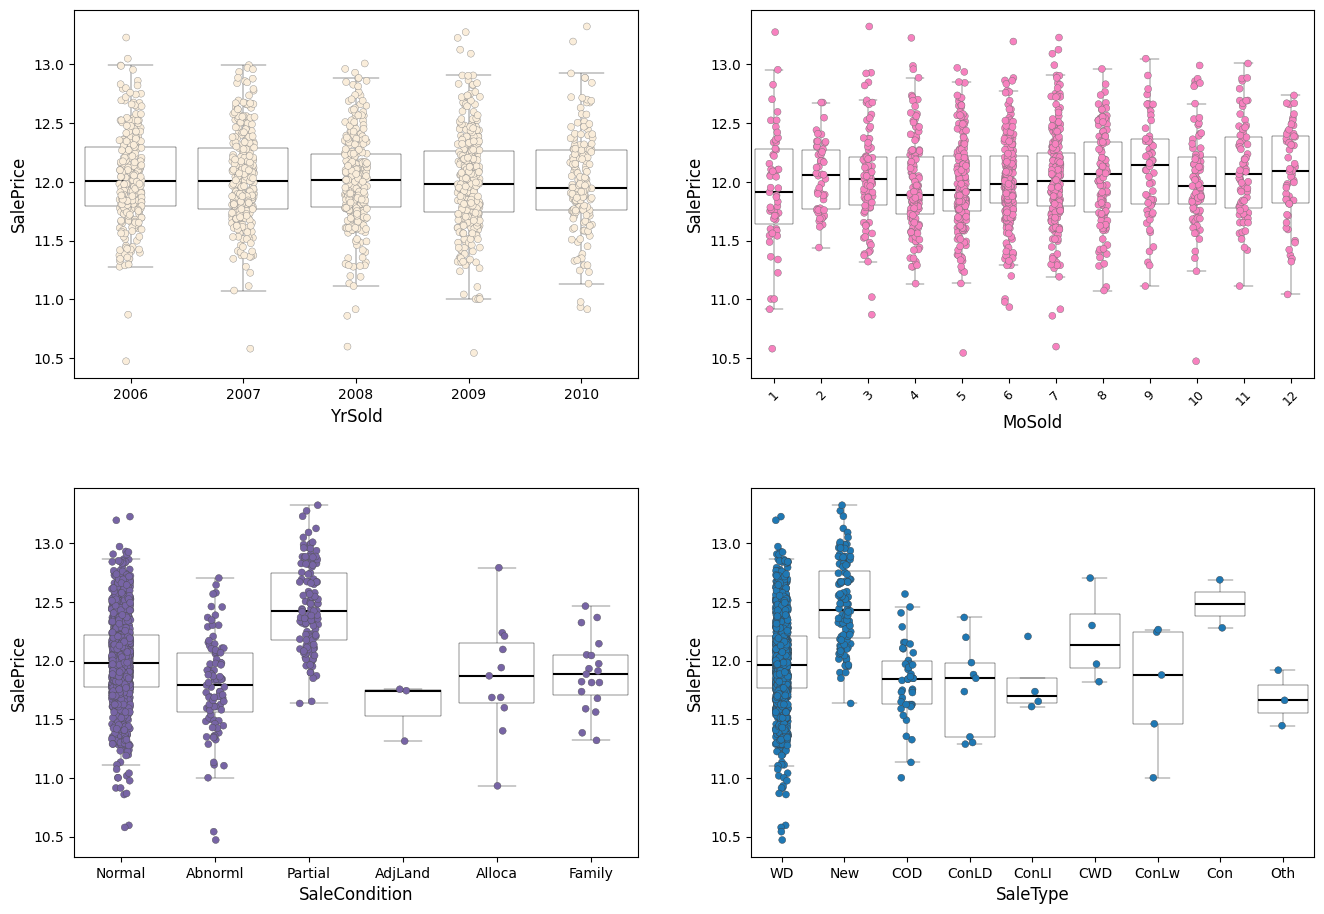

In [17]:
plt.figure(figsize=(16, 11))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Se_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(2, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 온도와 관련된 변수

    - 각 변수의 범주 값을 살펴볼 때, 특정 범주의 값에 몰려있어 다른 범주 값에 거의 없는 변수가 존재한다.

        - Heating

    - Fireokaces의 범주를 인코딩할 때 특정 범주의 값에서 데이터의 정보가 부족하기 때문에 라벨 간 데이터의 결합이 필요해 보인다.

    - CentralAir 변수는 범주에 따라 SalePrice와 관계가 있는 것으로 파악된다.

In [18]:
Tm_nominal_features = ['Fireplaces', 'Heating', 'CentralAir']

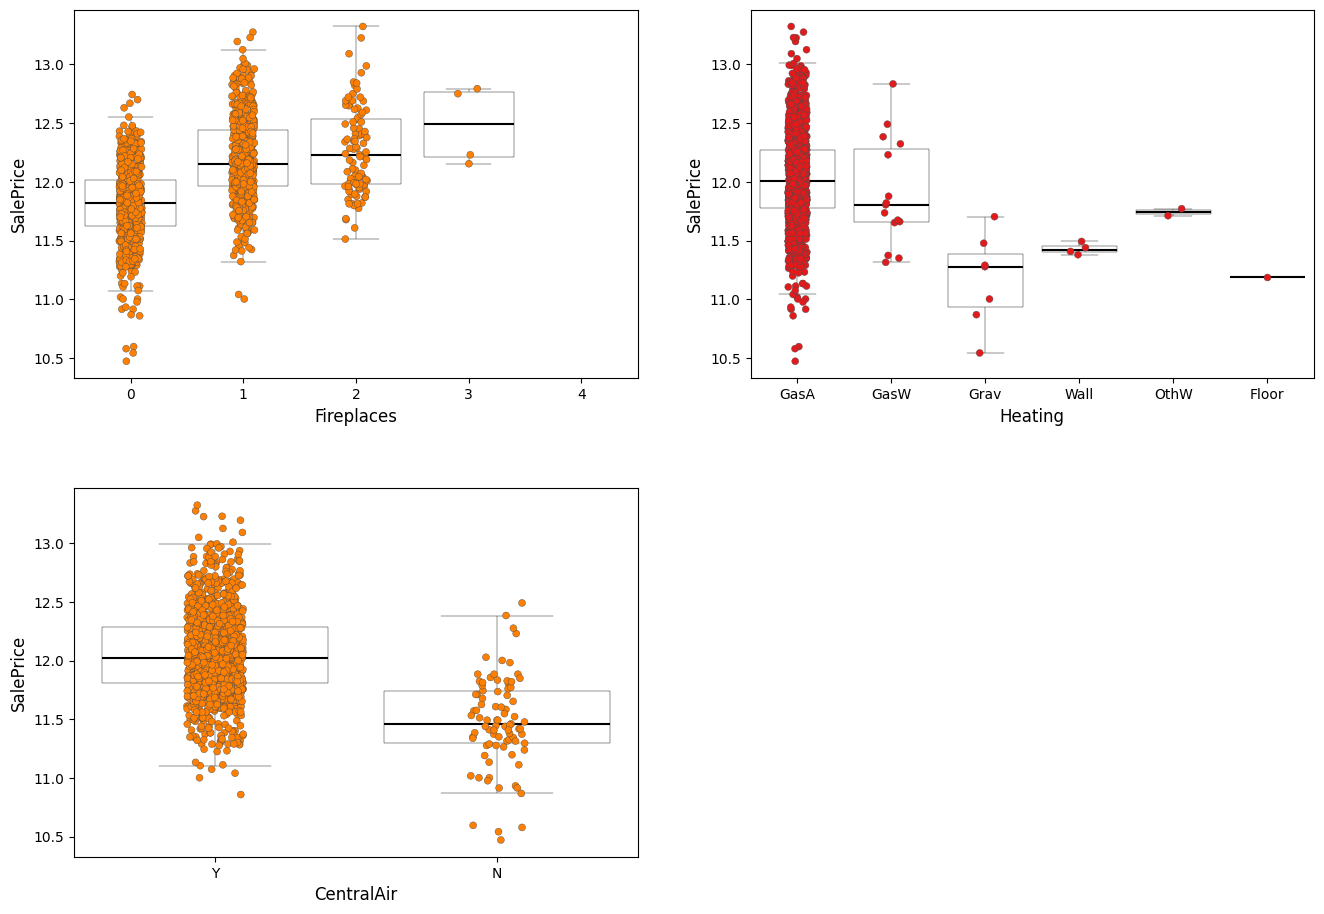

In [19]:
plt.figure(figsize=(16, 11))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Tm_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(2, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 차고 관련 변수

    - GarageCars 와 GarageType 변수는 각 범주를 인코딩할 때 특정 범주의 값에서 데이터의 정보가 부족하기 때문에 라벨 간 데이터의 결합이 필요해 보인다.

In [20]:
Ga_nominal_features = ['GarageCars', 'GarageType']

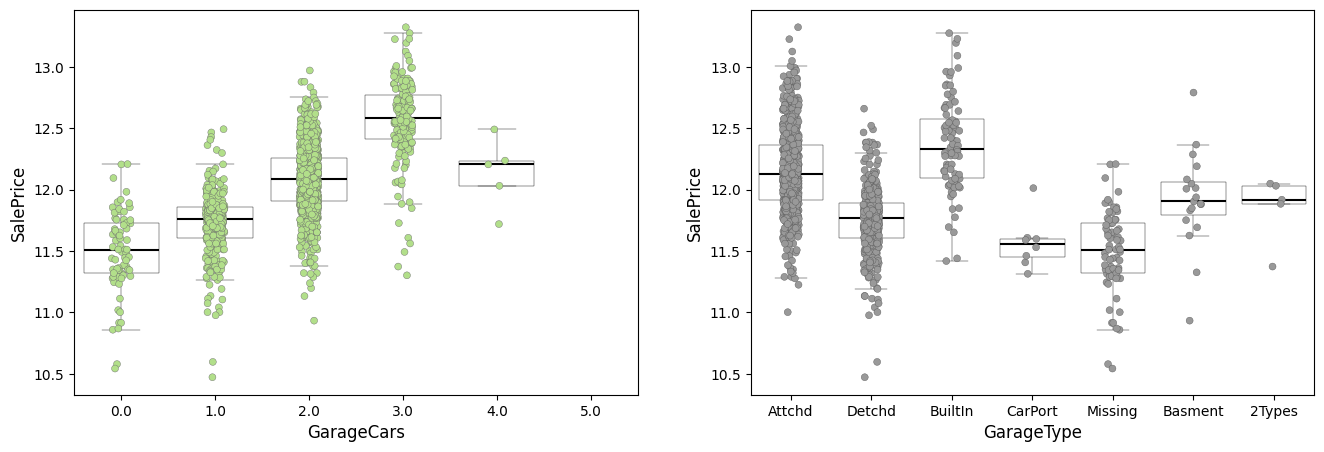

In [21]:
plt.figure(figsize=(16, 5))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Ga_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(1, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 외장 관련 변수

    - Exterior2nd 변수는 Exterior1st 변수와 거의 유사해 보인다.

In [22]:
Ex_nominal_features = ['Exterior2nd', 'Exterior1st']

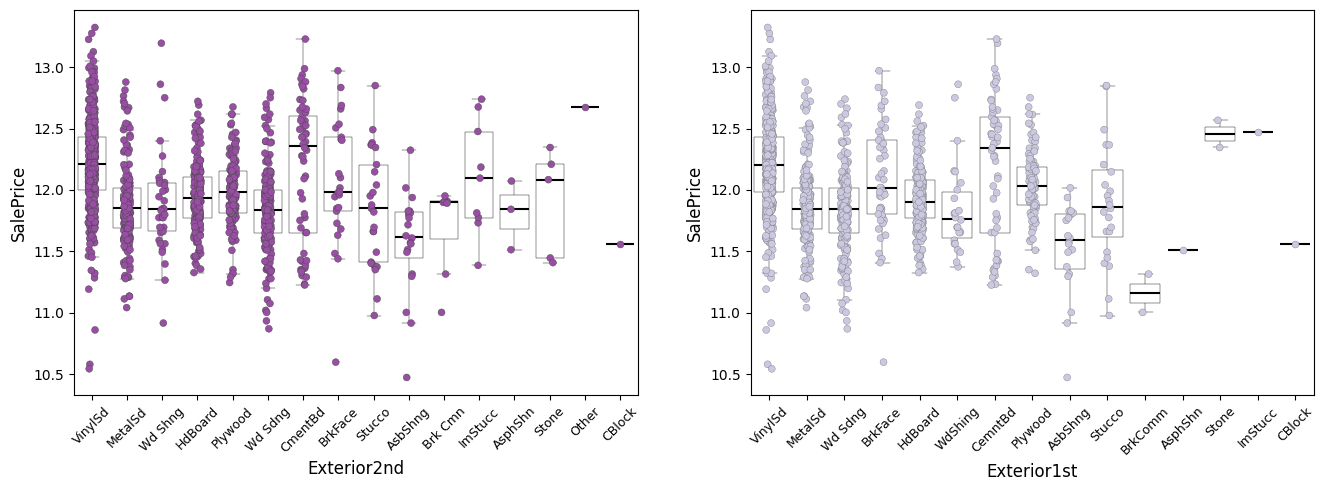

In [23]:
plt.figure(figsize=(16, 5))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Ex_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(1, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)

plt.show()

- 기타 변수

    - Electrical 변수는 SBrkr 값에 거의 치우쳐있고, 다른 범주에서는 데이터 샘플 수가 SBrkr에 비해 상대적으로 적다.

In [24]:
Et_nominal_features = ['Foundation', 'LandContour', 'Electrical']

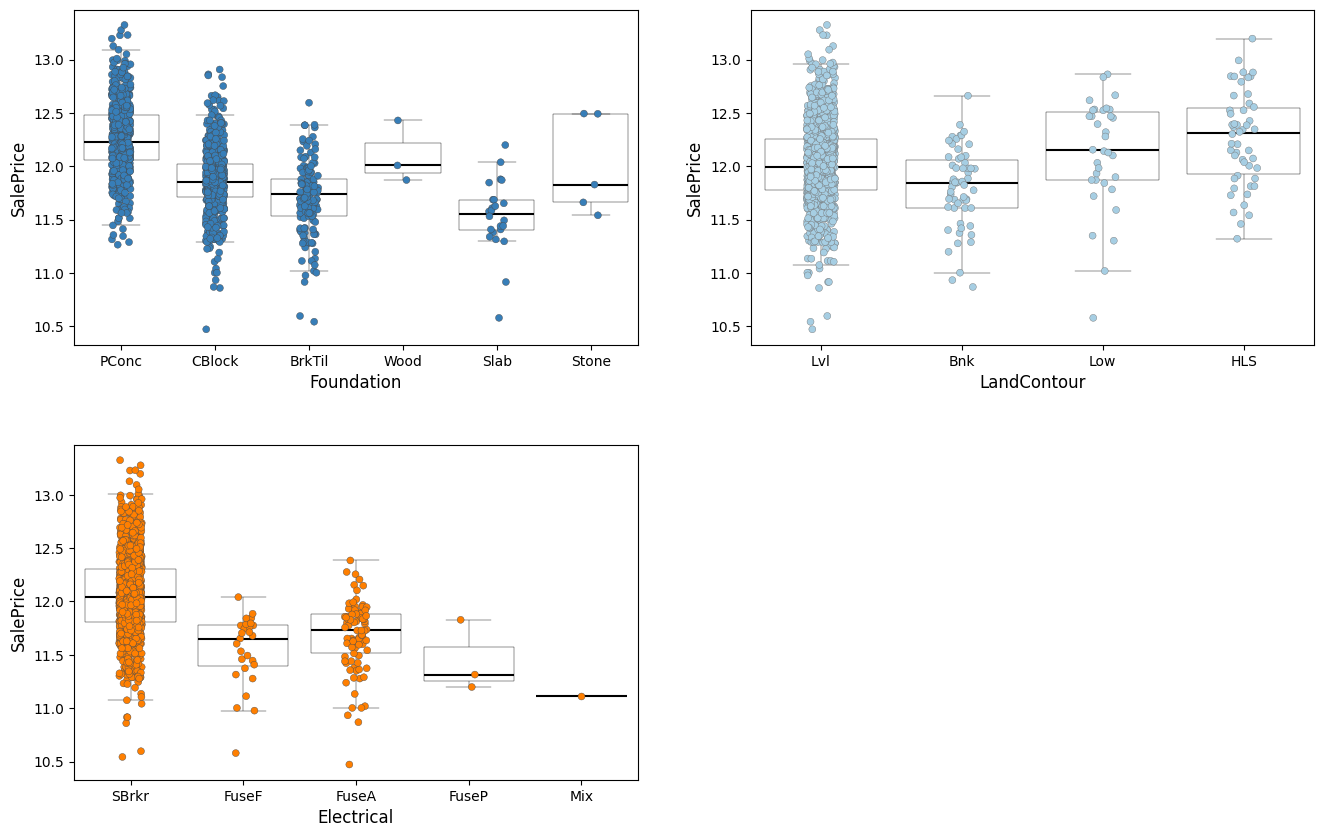

In [25]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Et_nominal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(2, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)


plt.show()

#### Ordinal Type

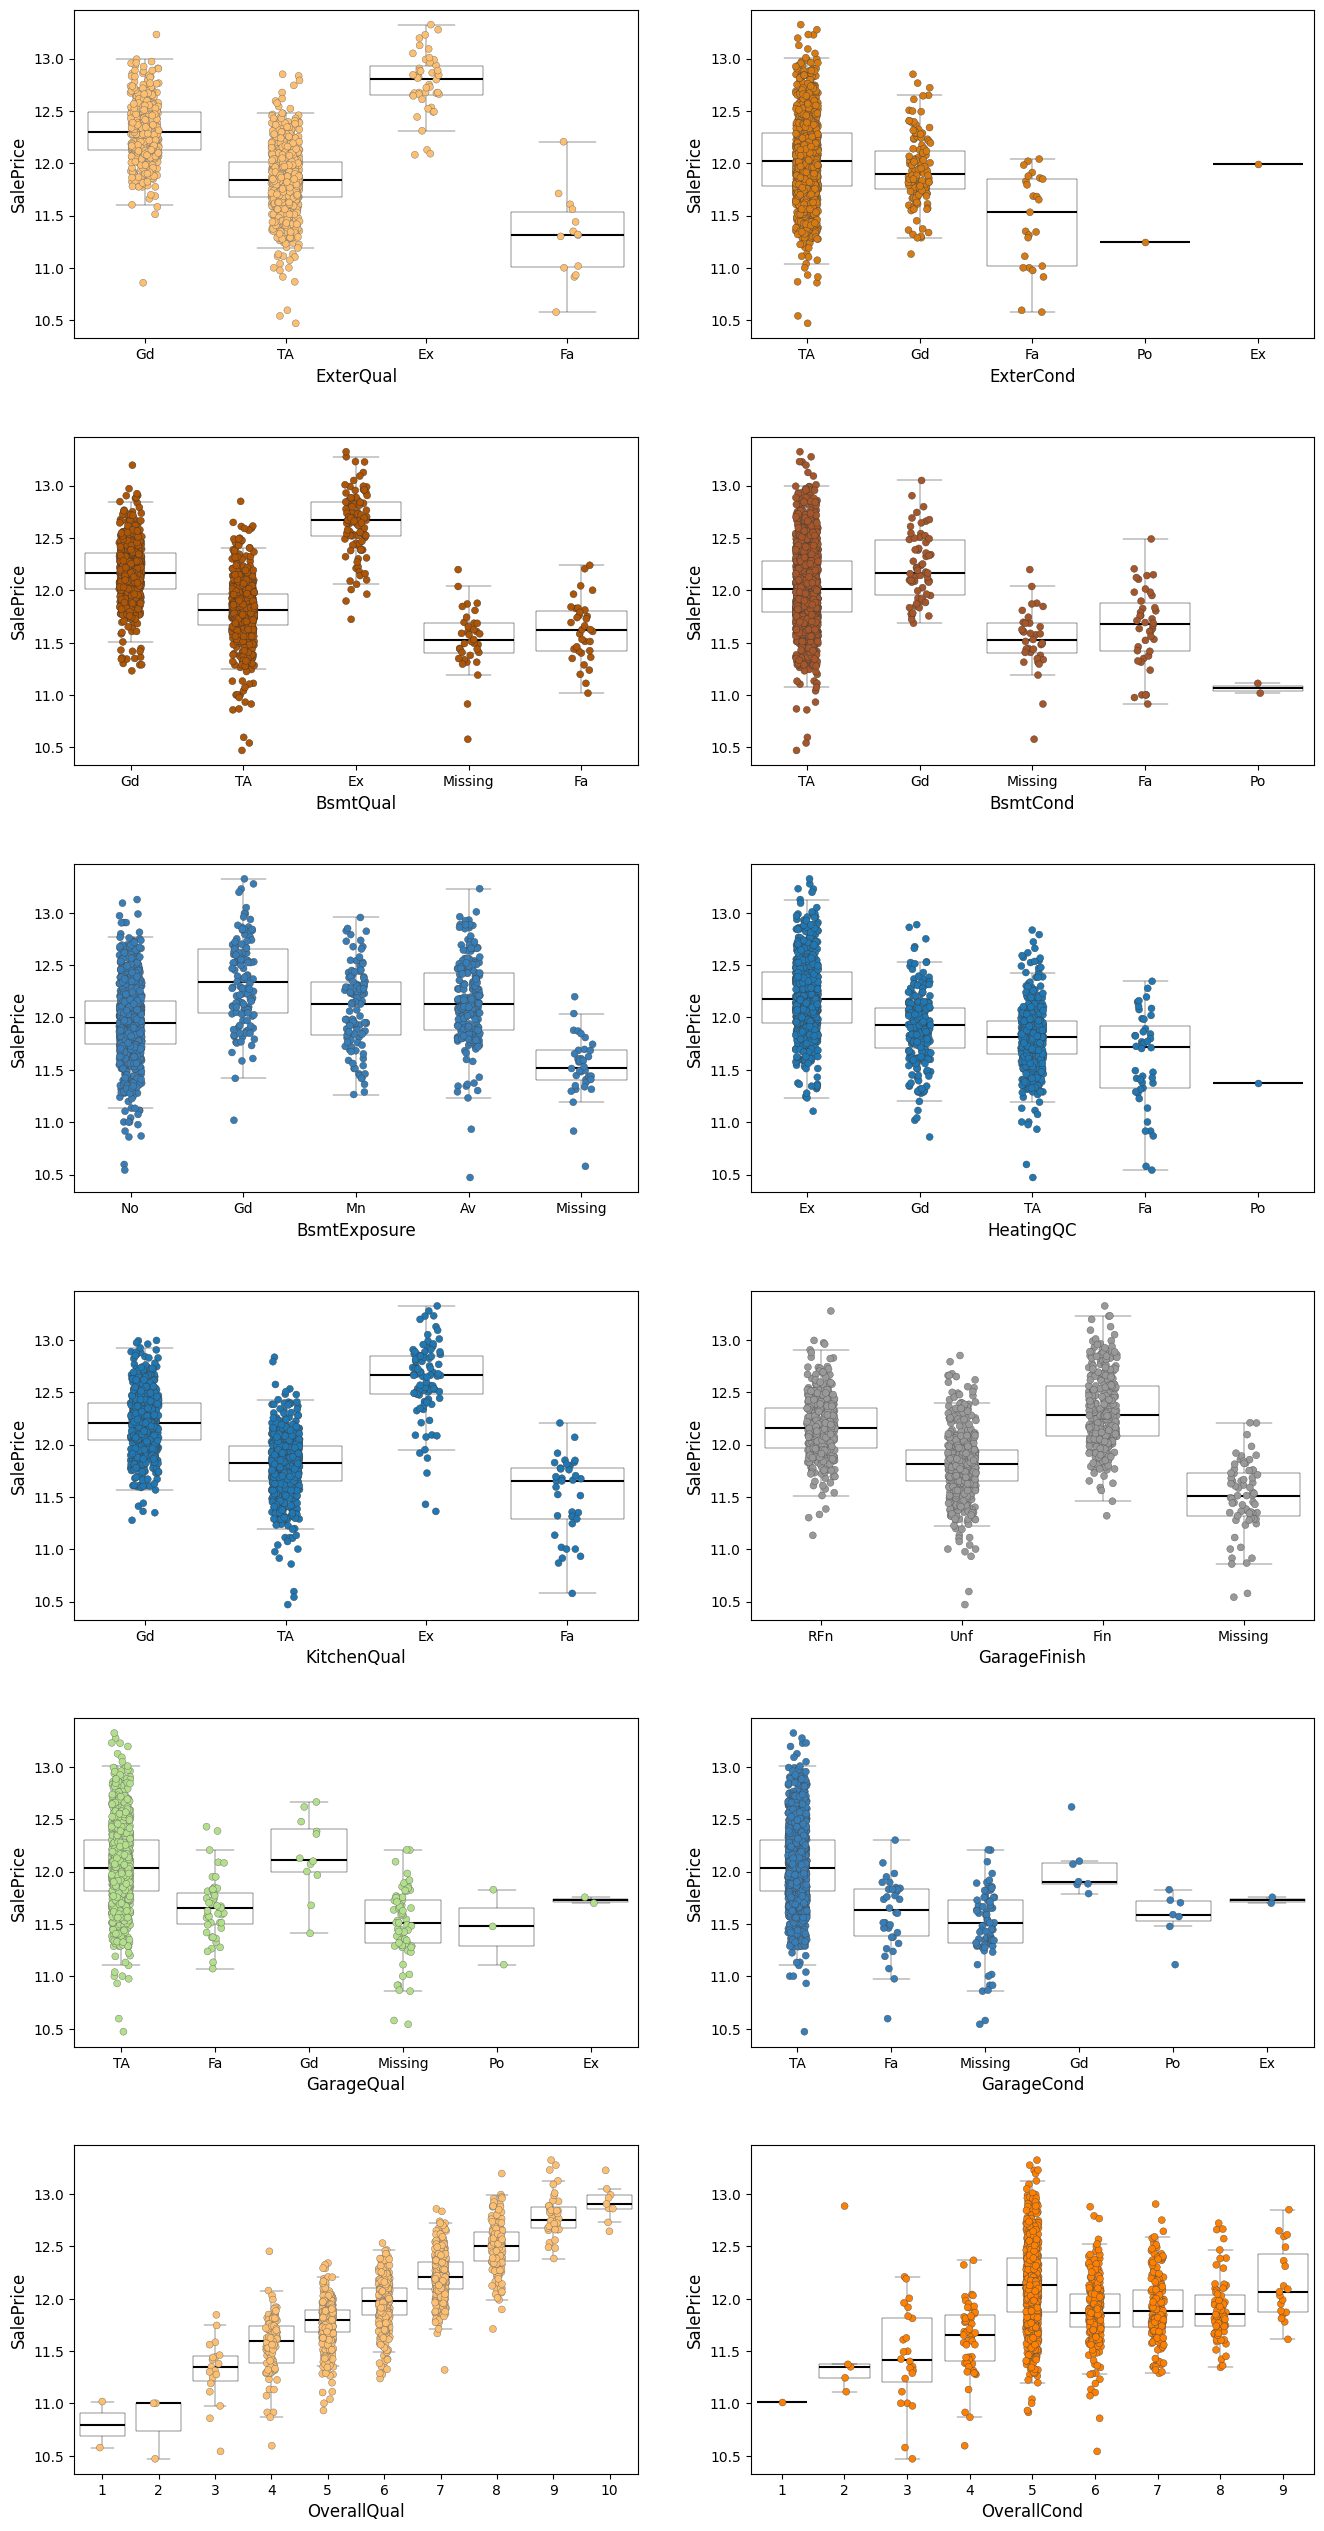

In [26]:
plt.figure(figsize=(16, 32))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(ordinal_features):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(6, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)


plt.show()

### Have_feature
- Have_EnclosedPorch 변수를 제외한 다른 변수들은 한 범주에 치우쳐 있으며, SalePrice와 관계가 없는 것으로 파악된다.

In [27]:
Have_feature = ['Have_PoolArea', 'Have_LowQualFinSF', 'Have_3SsnPorch', 'Have_MiscVal', 'Have_ScreenPorch', 'Have_BsmtFinSF2', 'Have_EnclosedPorch']

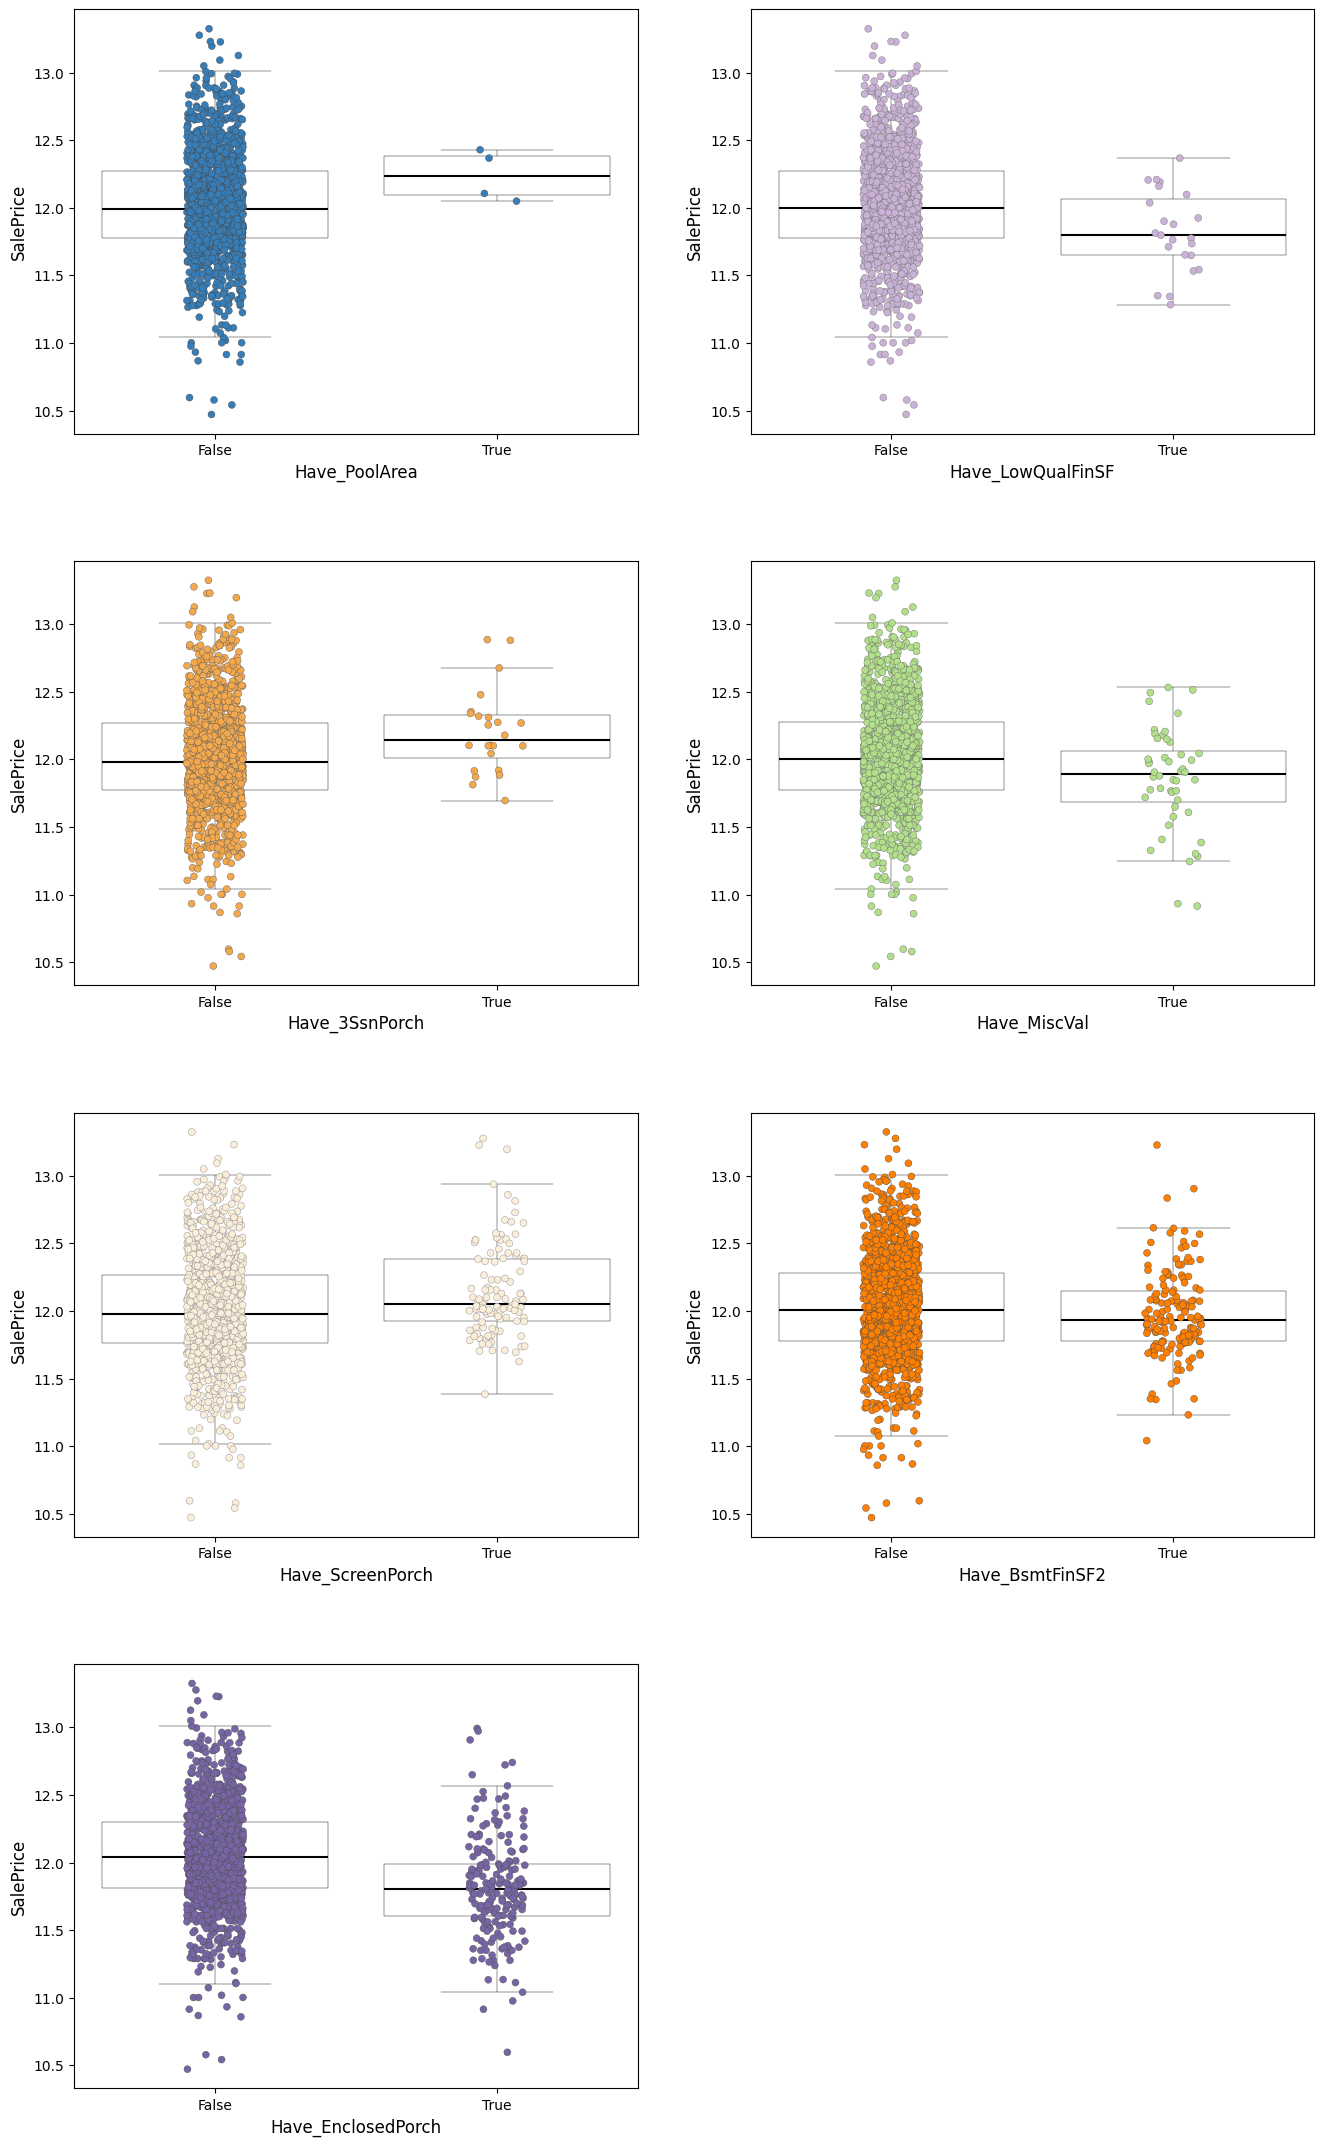

In [28]:
plt.figure(figsize=(16, 27))
plt.subplots_adjust(hspace=0.3)

PROBS = {
    'boxprops': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.3},
    'medianprops': {'color': 'black', 'linewidth': 1.5},
    'whiskerprops': {'color': 'black', 'linewidth': 0.3},
    'capprops': {'color': 'black', 'linewidth': 0.3}
}

for i, feature in enumerate(Have_feature):
    colors = np.random.choice(len(np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))))
    colors = np.vstack((np.array(palette_1), np.array(palette_2), np.array(palette_3)))[colors]
    colors = sns.color_palette(colors.reshape(1, -1))
    
    ax = plt.subplot(4, 2, i + 1)

    sns.boxplot(x=feature, data=house_df, y='Log_SalePrice', showfliers=False, boxprops=PROBS['boxprops'], 
                medianprops=PROBS['medianprops'], whiskerprops=PROBS['whiskerprops'], capprops=PROBS['capprops'])

    sns.stripplot(x=feature, data=house_df, y='Log_SalePrice', palette=colors, linewidth=0.3)
    if house_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)


plt.show()